<a href="https://colab.research.google.com/github/nesratekin/AI_Projesi/blob/main/ai_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    accuracy   roc_auc
RandomForest        0.970760  0.995150
SVM                 0.976608  0.996620
LogisticRegression  0.982456  0.997942
KNN                 0.959064  0.978689
DecisionTree        0.929825  0.934524
NaiveBayes          0.935673  0.992651
Best Model: LogisticRegression
Best Parameters: {'C': 1}
Accuracy: 0.9824561403508771
ROC AUC: 0.9979423868312757


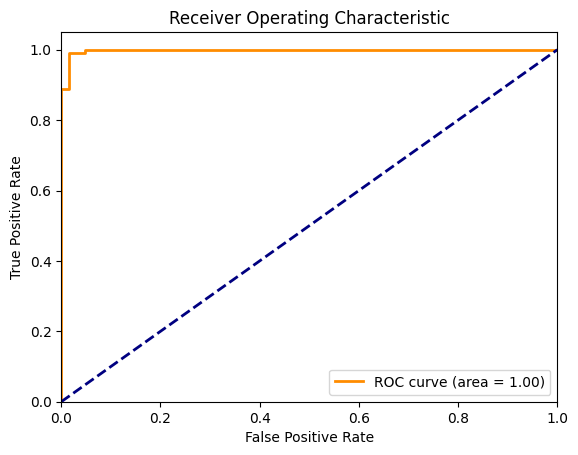

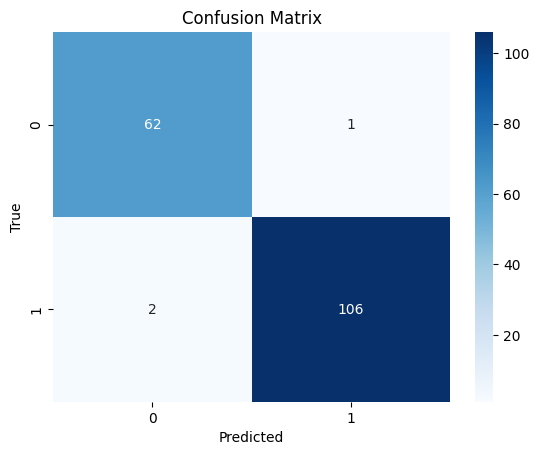

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Burada veri setini yükledim.
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Burada yüklediğim veri setini %70 eğitim ve %30 test olarak böldüm.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Burada veriyi ölçekledim. Train ve test olarak.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Burada modelleri tanımladım.
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB()
}

# Burada modelleri eğittim ve en iyi modeli seçtim.
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}

results_df = pd.DataFrame(results).T
print(results_df)

best_model_name = results_df['accuracy'].idxmax()
best_model = models[best_model_name]

# Burada hiperparametre aradım.
param_grid = {
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'DecisionTree': {'max_depth': [None, 10, 20]},
    'NaiveBayes': {}
}

grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Burada hipermparametre aradıktan sonra en iyi modeli yeniden eğittim.
best_params = grid_search.best_params_
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)

# Burada yendien eğittiğim modeli değerlendirdim.
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)

print(f'Best Model: {best_model_name}')
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')

# Burada Feature importance yaptım. (Ses kaydında yapın demiştiniz.)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('Feature Importances')
    plt.show()

# Burada ROC eğrisi çizdirdim. (Ses kaydında istediklerinizden biriydi buda.)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Burada Karmaşıklık matrisi yaptırdım. (Bunuda ses kaydında istemiştiniz.)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
